In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:

def stochastic_sd(arr, n=10000, seed=0):
    '''Estimate the standard deviation of an array by considering only the 
    subset of its elements.
    
    Parameters
    ----------
    n : int
        The number of elements to consider. If the array contains fewer elements,
        use all.
    seed : int
        The seed for the random number generator.
    '''
    arr = np.asarray(arr)
    if arr.size < n: 
        return np.sqrt(arr.var())
    else:
        return np.sqrt(
            np.random.RandomState(seed).choice(arr.flat, n, replace=True).var())

    

def is_symmetric(mat):
    """
    Check if a matrix is symmetric.
    """

    maxDiff = np.abs(mat - mat.T).max()
    return maxDiff < stochastic_sd(mat) * 1e-7 + 1e-5


In [103]:
np.random.random?

In [102]:
m=10
# with non-symmetric noise ...
M_test=np.zeros((m,m),dtype=np.float)+0.1*np.random.random((m,m))


my_noise = np.random.random((m,m))

# just checking my understanding of symmetric noise ....
print(is_symmetric(my_noise))
print(is_symmetric(my_noise+my_noise.T))

# sym noise with distro [0,2)
sym_noise = my_noise+my_noise.T
# sym noise with distro [0,1)
sym_noise *= 0.5

# with symmetric noise ...
M_test=np.zeros((m,m),dtype=np.float)+0.1*sym_noise



M_test[:5,5:]+=2
M_test[5:,:5]+=2
M_test-=1

#print(M_test)
#plt.imshow(M_test)
evals,evecs=np.linalg.eig(M_test)

# try using other eigendecomposition methods
# 1. scipy.sparse.linalg.eigsh for symetric matrices - should not have anyhting imaginary 
# 2. scipy.sparse.linalg.eigs for not neccessarily symmetric matrices , i.e. more general - expected small imaginry numbers
# 3. cooltools.numutils.get_eig

# beware of eigenvectors being rows vs columns - that changes from function to function ...
# enforce symmetry when needed - numerical algorithms that are not written for symmetrical mat-s might introduce small imaginary noise for matrices that actually symmetrical....

# later we'll try to see if SingularValue Decomposition would work for us or not - that's for non-square matrices ....

False
True


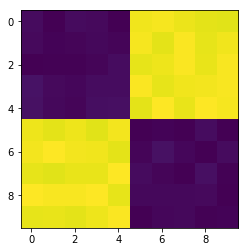

In [91]:
plt.imshow(M_test)

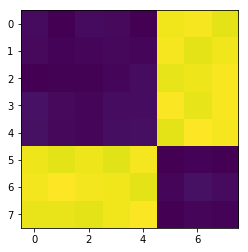

In [100]:
mask = np.asarray([1,1,1,1,1,1,1,0,0,1],dtype=np.bool)
M_test[mask,:][:,mask].shape
plt.imshow(M_test[mask,:][:,mask])

<BarContainer object of 10 artists>

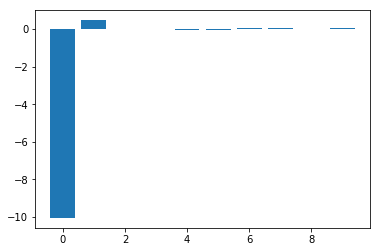

In [92]:
# plt.bar(range(m),np.abs(evals))
plt.bar(range(m),evals)

In [93]:
evecs

array([[ 3.14633732e-01+0.j        , -2.15330660e-01+0.j        ,
         1.31782408e-01+0.10432481j,  1.31782408e-01-0.10432481j,
         3.04507005e-01-0.28168951j,  3.04507005e-01+0.28168951j,
         5.40287422e-01+0.j        ,  5.40287422e-01-0.j        ,
         1.23639931e-02+0.j        ,  3.90210981e-01+0.j        ],
       [ 3.16702265e-01+0.j        , -2.47883490e-01+0.j        ,
        -3.38794288e-01-0.0171237j , -3.38794288e-01+0.0171237j ,
        -1.60403566e-01-0.08677698j, -1.60403566e-01+0.08677698j,
        -1.95865352e-01-0.11009308j, -1.95865352e-01+0.11009308j,
         5.84485196e-01+0.j        , -3.48727157e-01+0.j        ],
       [ 3.19150401e-01+0.j        , -2.62346538e-01+0.j        ,
        -1.82202436e-01-0.11884242j, -1.82202436e-01+0.11884242j,
        -1.53777348e-01-0.10585477j, -1.53777348e-01+0.10585477j,
        -2.66120664e-01+0.41151536j, -2.66120664e-01-0.41151536j,
        -2.12216627e-01+0.j        , -7.08419089e-02+0.j        ],
       

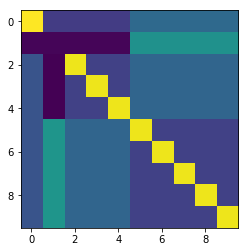

In [88]:
plt.imshow(evecs.T)

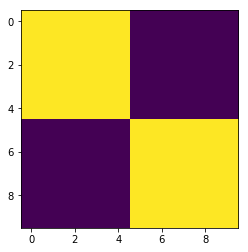

In [82]:
i=1
plt.imshow(np.outer(evecs[:,i],evecs[:,i]))

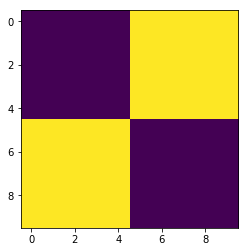

In [84]:
plt.imshow(0*np.outer(evecs[:,0],evecs[:,0])-np.outer(evecs[:,1],evecs[:,1]))

In [85]:
aaa = [evals[i]*np.outer(evecs[:,i],evecs[:,i]) for i in range(m)]

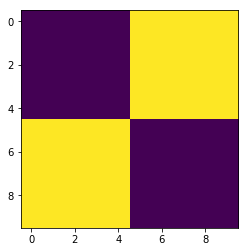

In [86]:
plt.imshow(sum(aaa))